In [1]:
import time

import numpy as np
import matplotlib.pyplot as plt

import utils

In [2]:
%ls -R spectra/

spectra/:
ardata.fits  HD110379/  HD186791/  X0319/  X0386/  X0538/  X0771/

spectra/HD110379:
BG20000                             tellstar_qvir_ordens_finalglue.fits
obs_HD110379_ordens_finalglue.fits

spectra/HD186791:
BG20000                             tellstar_35aql_ordens_finalglue.fits
obs_HD186791_ordens_finalglue.fits

spectra/X0319:
X0319_N_O_E.fits            X0319_U_O_E.fits      X0319_V_O_E.fits
X0319_N_O_E_TAC_final.fits  X0319_U_O_E_TAC.fits  X0319_V_O_E_TAC_final.fits
X0319_N_O_E_TRA.fits        X0319_U_O_E_TRA.fits  X0319_V_O_E_TRA.fits

spectra/X0386:
X0386_N_N_E.fits            X0386_U_N_E.fits      X0386_V_N_E.fits
X0386_N_N_E_TAC_final.fits  X0386_U_N_E_TAC.fits  X0386_V_N_E_TAC_final.fits
X0386_N_N_E_TRA.fits        X0386_U_N_E_TRA.fits  X0386_V_N_E_TRA.fits

spectra/X0538:
X0538_N_N_E.fits            X0538_U_N_E.fits      X0538_V_N_E.fits
X0538_N_N_E_TAC_final.fits  X0538_U_N_E_TAC.fits  X0538_V_N_E_TAC_final.fits
X0538_N_N_E_TRA.fits        X0538_U_N_E_TRA.fits 

In [4]:
obs_flux, obs_wl = utils.get_spectrum_data_and_wavelength(file='spectra/X0319/X0319_V_O_E.fits')
tel_flux, tel_wl = utils.get_spectrum_data_and_wavelength(file='spectra/X0319/X0319_V_O_E_TRA.fits')
corr_flux, corr_wl = utils.get_spectrum_data_and_wavelength('spectra/X0319/X0319_V_O_E_TAC_final.fits')

In [6]:
def average_of_middle_elements(flux, size=20):
    mid_idx = int(len(flux) / 2)
    mid_values = flux[mid_idx - int(size/2):mid_idx + int(size/2) + 1]
    
    return np.mean(mid_values)

In [7]:
obs_avg_flux = average_of_middle_elements(obs_flux)

In [16]:
obs_normalized_flux = obs_flux 

In [17]:
len(obs_normalized_flux)

32423

Distance: 9393757825.42757
Are all warp path indices aligned? True


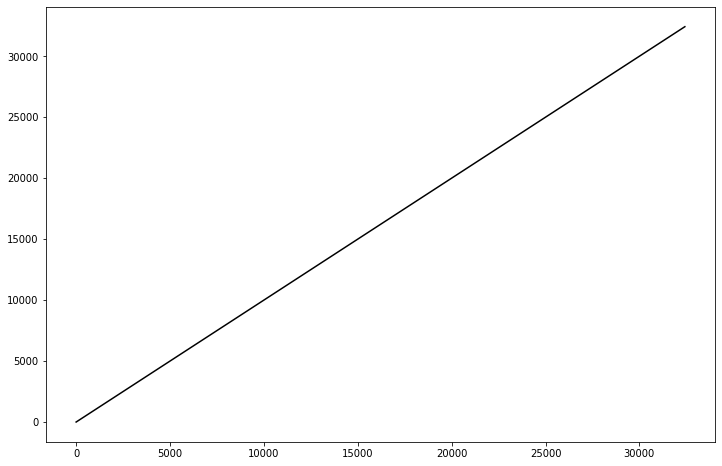

Elapsed time in seconds: 1.6439356803894043


In [18]:
start = time.time()

dtw_path = utils.fast_dtw_on_stellar_spectra(tel_flux, obs_normalized_flux)

end = time.time()
print('Elapsed time in seconds: {}'.format(end - start))

In [11]:
aligned_tel = utils.align_sequence_dtw_path(dtw_path, tel_flux)

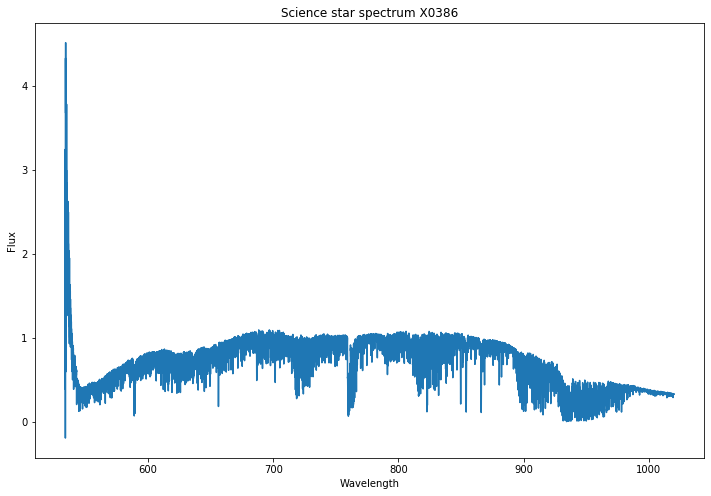

In [12]:
utils.plot_spectrum(obs_normalized_flux, obs_wl, 'Science star spectrum X0386')

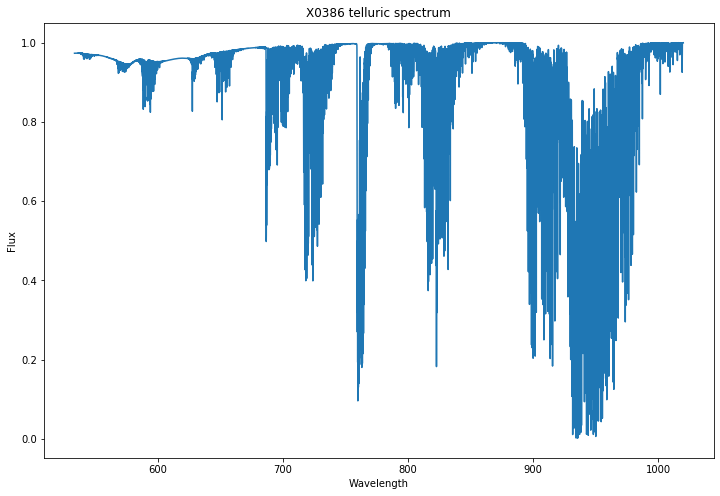

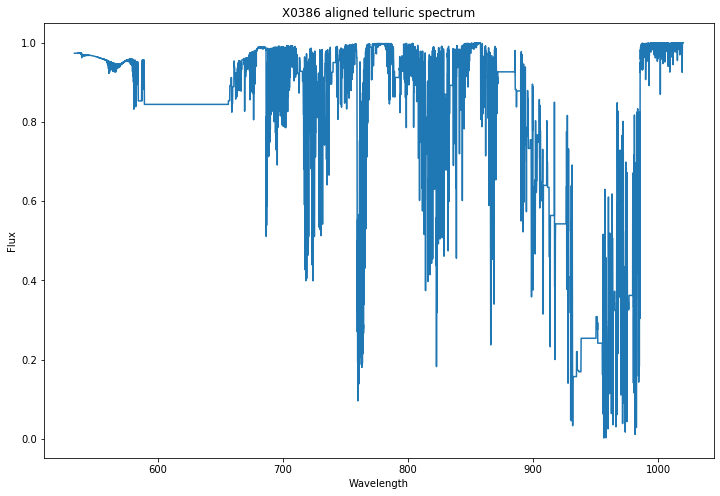

In [13]:
utils.plot_spectrum(tel_flux, tel_wl, 'X0386 telluric spectrum')
utils.plot_spectrum(aligned_tel, tel_wl, 'X0386 aligned telluric spectrum')

In [14]:
corr_avg_flux = average_of_middle_elements(corr_flux)
corr_normalized_flux = corr_flux / corr_avg_flux

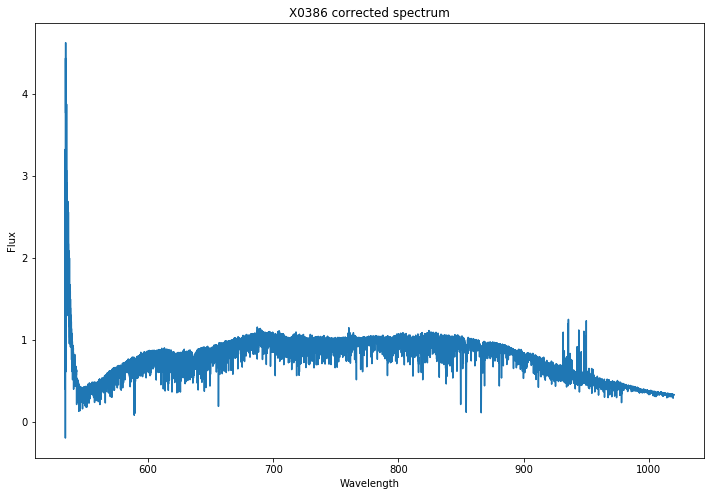

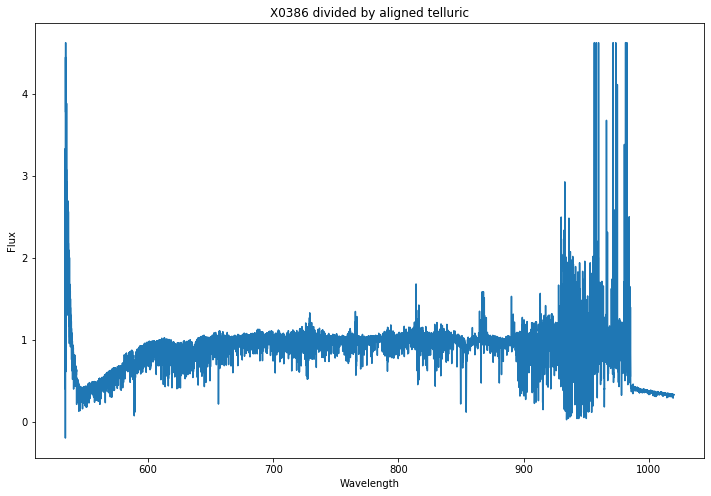

In [15]:
utils.plot_spectrum(corr_normalized_flux, corr_wl, 'X0386 corrected spectrum')

divided_flux = obs_normalized_flux / aligned_tel
clipped_divided_flux = np.clip(divided_flux, corr_normalized_flux.min(), corr_normalized_flux.max())
utils.plot_spectrum(clipped_divided_flux, obs_wl, 'X0386 divided by aligned telluric')